In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
data = pd.read_excel('/content/sample_data/Financial Sample.xlsx')

In [3]:
data

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Midmarket,France,Paseo,None,549.0,10,15,8235.0,0.0,8235.0,5490.0,2745.0,2013-09-01,9,September,2013
1,Small Business,Mexico,Paseo,None,788.0,10,300,236400.0,0.0,236400.0,197000.0,39400.0,2013-09-01,9,September,2013
2,Government,France,VTT,None,1527.0,250,350,534450.0,0.0,534450.0,397020.0,137430.0,2013-09-01,9,September,2013
3,Enterprise,United States of America,Carretera,Low,330.0,3,125,41250.0,412.5,40837.5,39600.0,1237.5,2013-09-01,9,September,2013
4,Small Business,United States of America,Montana,Low,2498.0,5,300,749400.0,7494.0,741906.0,624500.0,117406.0,2013-09-01,9,September,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Midmarket,Canada,Montana,High,2300.0,5,15,34500.0,4830.0,29670.0,23000.0,6670.0,2014-12-01,12,December,2014
696,Channel Partners,United States of America,Paseo,High,914.0,10,12,10968.0,1645.2,9322.8,2742.0,6580.8,2014-12-01,12,December,2014
697,Government,France,Paseo,High,293.0,10,20,5860.0,879.0,4981.0,2930.0,2051.0,2014-12-01,12,December,2014
698,Channel Partners,United States of America,Velo,High,914.0,120,12,10968.0,1645.2,9322.8,2742.0,6580.8,2014-12-01,12,December,2014


In [4]:
dic = data.to_dict()

In [5]:
cols = list(dic.keys())


In [6]:
cols

['Segment',
 'Country',
 'Product',
 'Discount Band',
 'Units Sold',
 'Manufacturing Price',
 'Sale Price',
 'Gross Sales',
 'Discounts',
 ' Sales',
 'COGS',
 'Profit',
 'Date',
 'Month Number',
 'Month Name',
 'Year']

In [7]:
df = data
# Remove any duplicates
df.drop_duplicates(inplace=True)

# Remove any missing values
df.dropna(inplace=True)

# Remove any outliers beyond 3 standard deviations from the mean
df = df[np.abs(df['Units Sold'] - df['Units Sold'].mean()) <= (3 * df['Units Sold'].std())]

# Convert categorical variables to dummy variables
df = pd.get_dummies(df, columns=['Segment', 'Country', 'Product', 'Discount Band'])

In [8]:
df


,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,...,Product_Amarilla,Product_Carretera,Product_Montana,Product_Paseo,Product_VTT,Product_Velo,Discount Band_High,Discount Band_Low,Discount Band_Medium,Discount Band_None
0,549.0,10,15,8235.0,0.0,8235.0,5490.0,2745.0,2013-09-01,9,...,0,0,0,1,0,0,0,0,0,1
1,788.0,10,300,236400.0,0.0,236400.0,197000.0,39400.0,2013-09-01,9,...,0,0,0,1,0,0,0,0,0,1
2,1527.0,250,350,534450.0,0.0,534450.0,397020.0,137430.0,2013-09-01,9,...,0,0,0,0,1,0,0,0,0,1
3,330.0,3,125,41250.0,412.5,40837.5,39600.0,1237.5,2013-09-01,9,...,0,1,0,0,0,0,0,1,0,0
4,2498.0,5,300,749400.0,7494.0,741906.0,624500.0,117406.0,2013-09-01,9,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,2300.0,5,15,34500.0,4830.0,29670.0,23000.0,6670.0,2014-12-01,12,...,0,0,1,0,0,0,1,0,0,0
696,914.0,10,12,10968.0,1645.2,9322.8,2742.0,6580.8,2014-12-01,12,...,0,0,0,1,0,0,1,0,0,0
697,293.0,10,20,5860.0,879.0,4981.0,2930.0,2051.0,2014-12-01,12,...,0,0,0,1,0,0,1,0,0,0
698,914.0,120,12,10968.0,1645.2,9322.8,2742.0,6580.8,2014-12-01,12,...,0,0,0,0,0,1,1,0,0,0


In [9]:
# Compute some basic statistics
mean_units_sold = df['Units Sold'].mean()
median_profit = df['Profit'].median()
min_sale_price = df['Sale Price'].min()
max_sale_price = df['Sale Price'].max()

# Print the statistics
print(f"Mean units sold: {mean_units_sold:.2f}")
print(f"Median profit: {median_profit:.2f}")
print(f"Minimum sale price: {min_sale_price:.2f}")
print(f"Maximum sale price: {max_sale_price:.2f}")

Mean units sold: 1592.82
Median profit: 9242.60
Minimum sale price: 7.00
Maximum sale price: 350.00


<ipython-input-10-da64d5a4de32>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


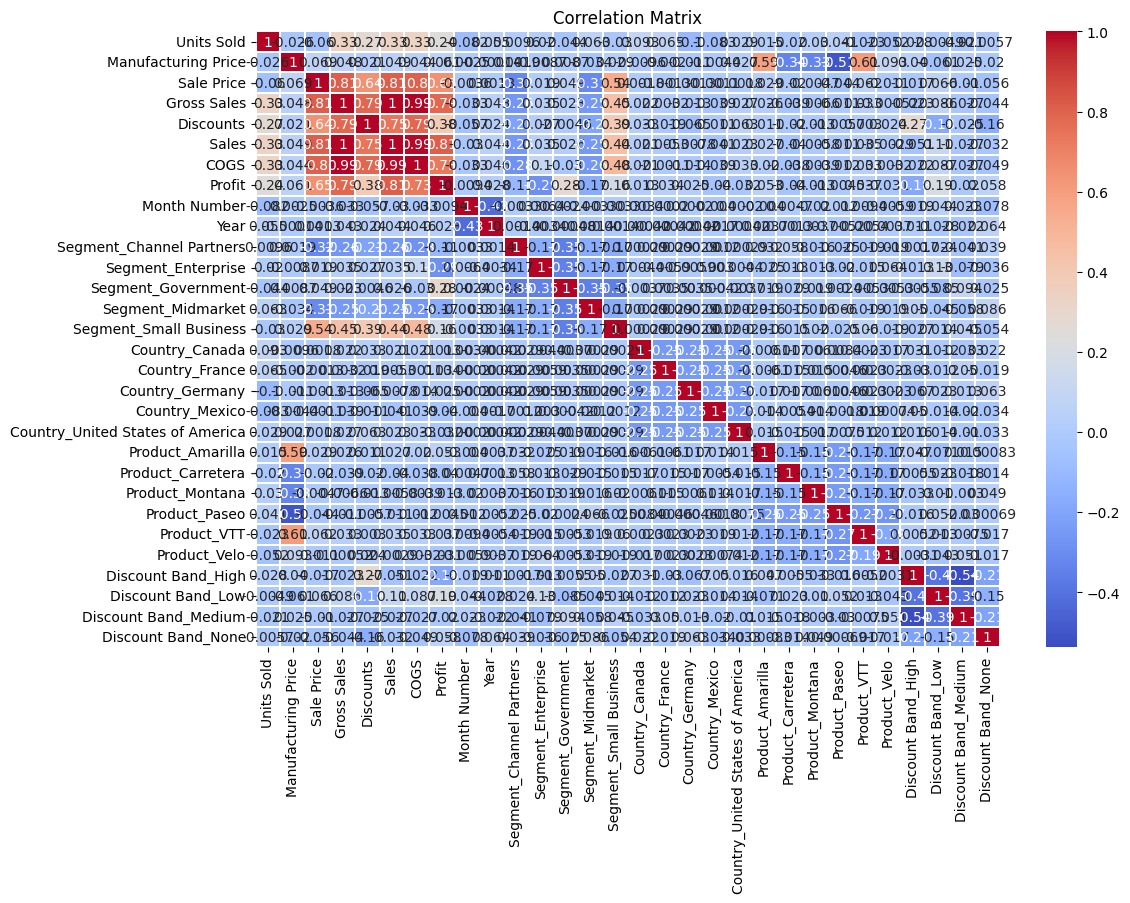

In [10]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.2)
plt.title('Correlation Matrix')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Selecting the features and the target variable
features = ['Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', ' Sales', 'COGS']
target = 'Profit'

X = data[features]
y = data[target]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [15]:


predictions = model.predict(X_test)
print(predictions)

[ 2.74599000e+04  2.25464400e+04  6.80208000e+03  1.28316000e+04
  1.55681000e+03  4.72730000e+03  1.94217000e+03  3.27080000e+03
  4.84440000e+04  1.86900000e+03  1.65100000e+04  3.60000000e+03
  2.51125000e+03  2.40825000e+03  4.58800000e+04  1.23500000e+04
  2.38882000e+03  2.62200000e+05  1.13442000e+04  1.44932000e+05
 -1.07625000e+03  1.25496000e+04 -2.38700000e+04  1.90260000e+04
  8.08000000e+03  8.93640000e+03  3.88850000e+04  2.38791000e+05
  8.60480000e+03  3.94000000e+04 -1.07625000e+03  1.48761600e+04
 -3.52625000e+04  2.21674000e+03  1.50336000e+04  1.87200000e+03
  8.51160000e+03  9.01180000e+03  7.96630000e+04  5.93232000e+03
  7.31172000e+03  4.67400000e+02  2.92000000e+03  4.18608000e+03
  2.72625000e+03  2.54880000e+04  1.53734400e+04  4.73280000e+04
  7.06420000e+04  3.23125000e+03  1.23500000e+04  6.82250000e+03
  2.72625000e+03  1.86407500e+05  8.51160000e+03  4.43850000e+03
  1.39050000e+04  3.74418000e+03  6.77120000e+03  2.90664000e+03
  2.95125000e+03  1.61850

In [16]:
from sklearn.metrics import mean_squared_error
print(f'Mean Squared Error: {mean_squared_error(y_test, predictions)}')

Mean Squared Error: 2.5700673198144263e-19


In [17]:
from sklearn.metrics import r2_score
r2_score(y_test,predictions)

1.0

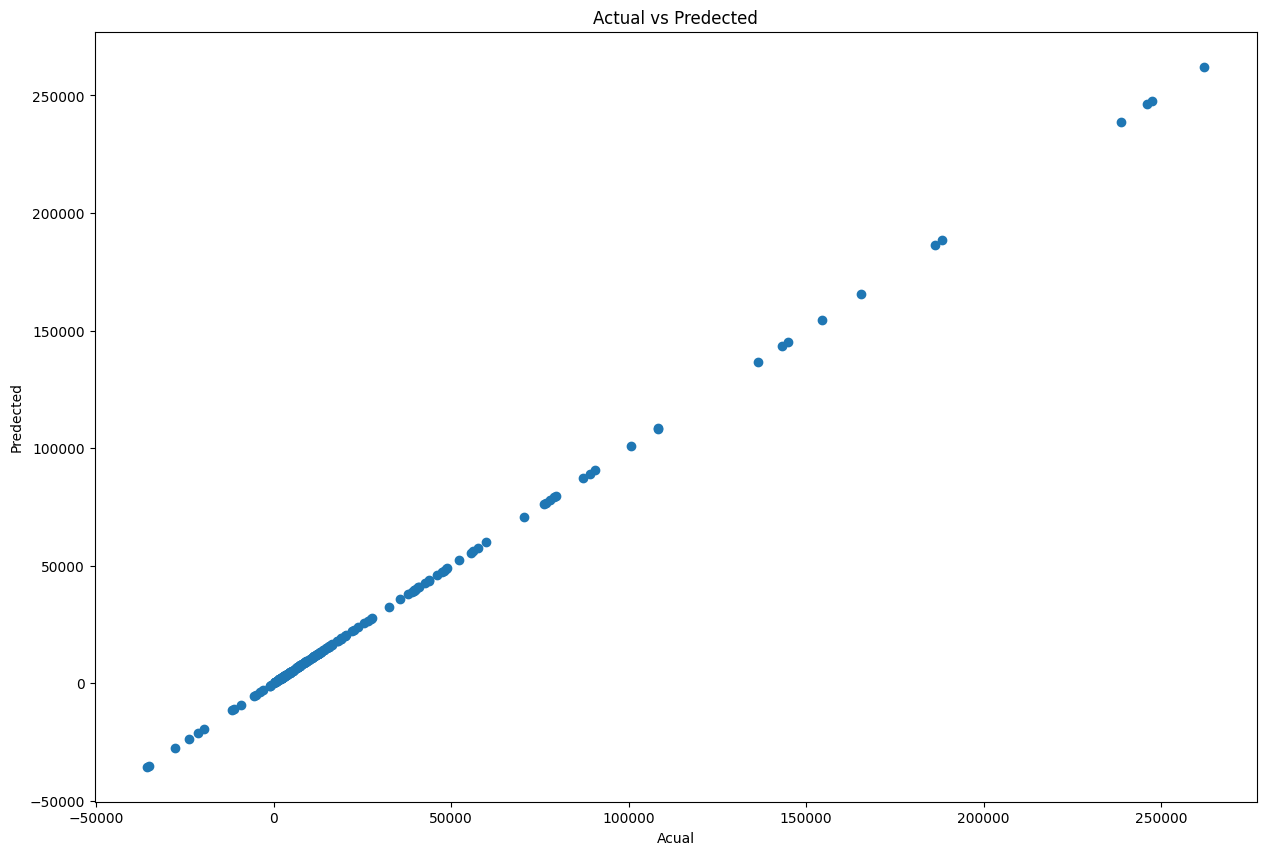

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test,predictions)
plt.xlabel('Acual')
plt.ylabel('Predected')
plt.title('Actual vs Predected')
plt.show()

In [19]:
pred_y_df=pd.DataFrame({'Acual Value':y_test,'Predected Value': predictions, 'Difference':y_test-predictions})
pred_y_df[0:20]

,Acual Value,Predected Value,Difference
306,27459.90,27459.90,2.946763e-10
604,22546.44,22546.44,3.128662e-10
40,6802.08,6802.08,3.201421e-10
493,12831.60,12831.60,3.165042e-10
14,1556.81,1556.81,3.283276e-10
548,4727.30,4727.30,2.946763e-10
267,1942.17,1942.17,3.146852e-10
31,3270.80,3270.80,3.201421e-10
252,48444.00,48444.00,-2.619345e-10
103,1869.00,1869.00,3.228706e-10


In [20]:
import seaborn as sns
import statsmodels.api as sm


Linearity

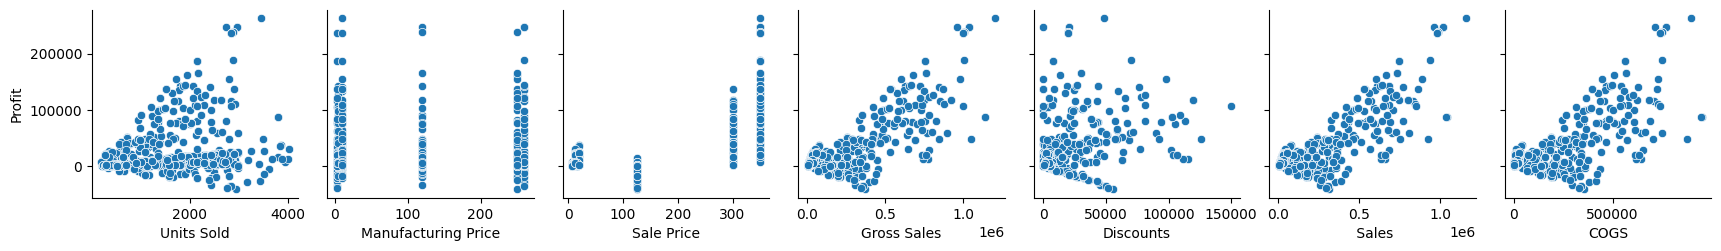

In [24]:
sns.pairplot(df, y_vars= target, x_vars=features)

Independence

In [25]:
sm.stats.durbin_watson(df[target])


1.3135262227503561

Normality

In [32]:
pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Shapiro-Wilk test statistic: 0.8910911083221436
Shapiro-Wilk p-value: 9.293779088558698e-22


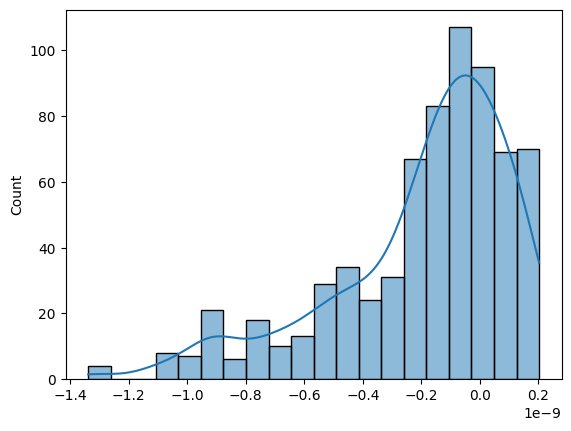

In [34]:
from scipy.stats import shapiro

model = sm.OLS(df[target], sm.add_constant(df[features]))
results = model.fit()
residuals = results.resid
sns.histplot(residuals, kde=True)

statistic, p_value = shapiro(residuals)

print("Shapiro-Wilk test statistic:", statistic)
print("Shapiro-Wilk p-value:", p_value)


Multicolinearity

<Axes: >

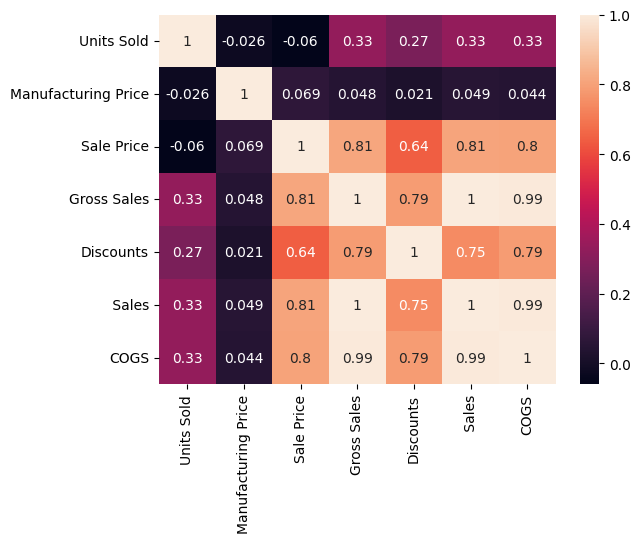

In [37]:
correlation_matrix = df[features].corr()
sns.heatmap(correlation_matrix, annot=True)


In [41]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[features]
vif = pd.DataFrame()
vif["Variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

             Variables         VIF
0           Units Sold    2.170347
1  Manufacturing Price    1.650221
2           Sale Price    4.816673
3          Gross Sales         inf
4            Discounts         inf
5                Sales         inf
6                 COGS  145.221749


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [43]:
model = sm.OLS(df[target], sm.add_constant(df[features]))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.554e+30
Date:                Sat, 10 Jun 2023   Prob (F-statistic):               0.00
Time:                        10:15:56   Log-Likelihood:                 14131.
No. Observations:                 696   AIC:                        -2.825e+04
Df Residuals:                     689   BIC:                        -2.822e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2.397e-10   4